<div>
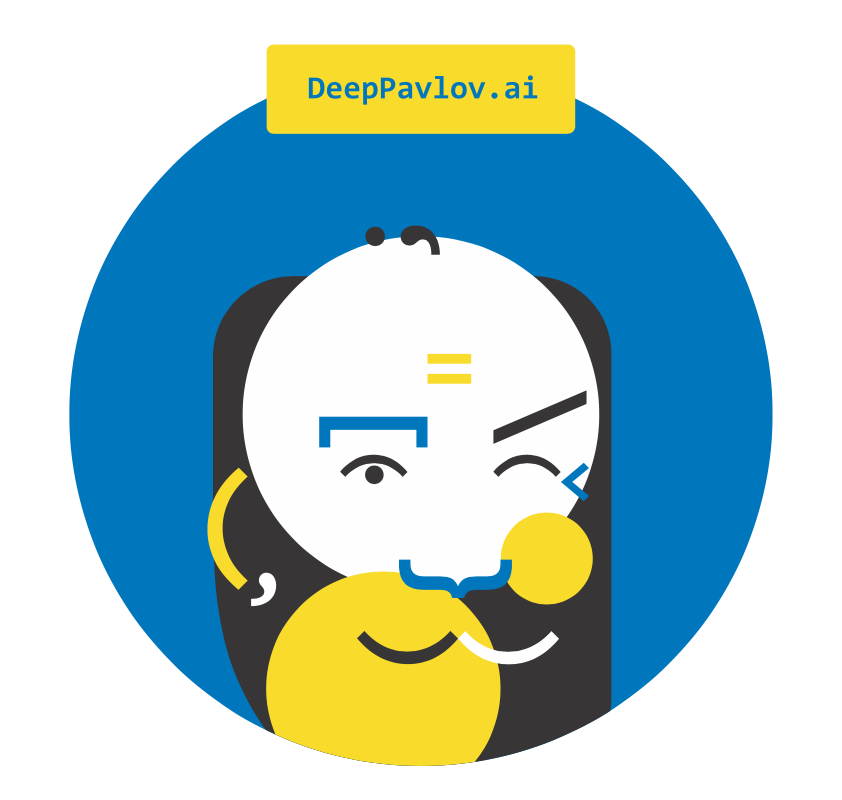
</div>

# <center>Relation Extraction for English</center>

<center>In this small tutorial, we are going to show how we could use relation extraction for the English language</center> 

# 1. Data

The model was trained on [DocRed](https://arxiv.org/pdf/1906.06127.pdf) English corpus for document-level relation extracton task. It was constructed from Wikipedia and Wikidata and is now the largest human-annotated dataset for document-level RE from plain text.

<div>
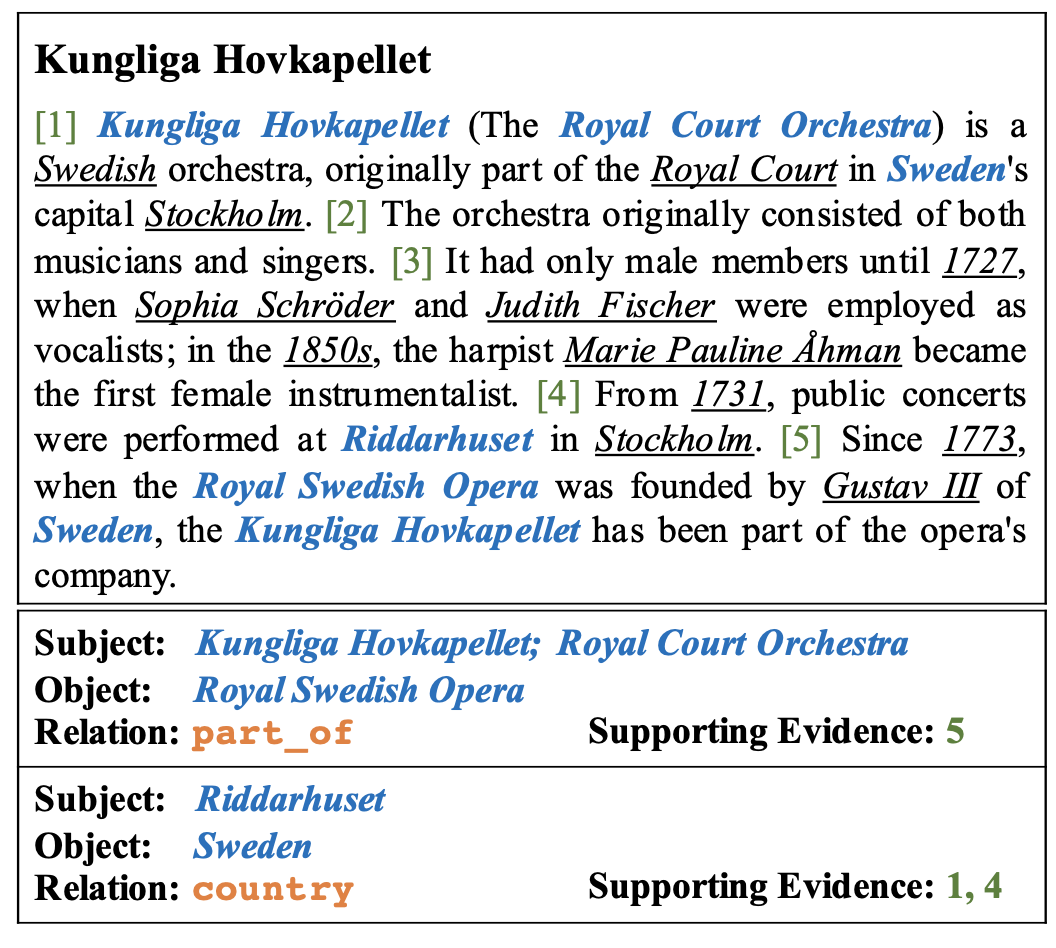
</div>

### <center>Dataset size</center>

As the original DocRED test dataset containes only unlabeled data, while we want to have labeled one in order to perform evaluation, we decided to: 
1. merge train and dev data (= labeled data)
2. split them into new train, dev and test dataset

Currently, there are two types of possible splittings provided:

- user can set the relative size of dev and test data (e.g. 1/7)
- user can set the absolute size of dev and test data (e.g. 2000 samples)

In our experiment, we set the absolute size of dev and test data == 150 initial documents. It resulted in approximately 3500 samples. 

We additionally generate negative samples if it was necessary to have the following proportions:
- for train set: negative samples are twice as many as positive ones
- for dev & test set: negative samples are the same amount as positive ones

| Train | Dev | Test |
| --- | --- | --- |
| 130650 | 3406 |3545 |


| Train Positive | Train Negative | Dev Positive | Dev Negative | Test Positive | Test Negative |
| --- | --- | --- | --- | --- | --- |
| 44823 | 89214 | 1239 | 1229 | 1043 | 1036 |


### <center>Relation statistics</center>


| Relation                          | Relation id  | # samples (train) | # samples (valid) |   # samples (test) |
|:-------------------------------------------------|:------|------:|-----:|-----:|
| head of government                               | P6    |   235 |   11 |    7 |
| country                                          | P17   | 11189 |  288 |  275 |
| place of birth                                   | P19   |   616 |   25 |   15 |
| place of death                                   | P20   |   242 |    3 |    8 |
| father                                           | P22   |   314 |    9 |    9 |
| mother                                           | P25   |    86 |    0 |    3 |
| spouse                                           | P26   |   365 |    8 |   12 |
| country of citizenship                           | P27   |  3321 |   95 |   74 |
| continent                                        | P30   |   428 |   29 |   20 |
| instance of                                      | P31   |   140 |    5 |    6 |
| head of state                                    | P35   |   181 |    3 |    5 |
| capital                                          | P36   |   106 |    0 |    6 |
| official language                                | P37   |   153 |    6 |    7 |
| position held                                    | P39   |    29 |    0 |    2 |
| child                                            | P40   |   417 |   11 |   13 |
| author                                           | P50   |   389 |   15 |    9 |
| member of sports team                            | P54   |   533 |   10 |    2 |
| director                                         | P57   |   316 |    9 |   11 |
| screenwriter                                     | P58   |   184 |    5 |    2 |
| educated at                                      | P69   |   375 |   22 |   10 |
| composer                                         | P86   |   126 |    6 |    4 |
| member of political party                        | P102  |   480 |   15 |    9 |
| employer                                         | P108  |   235 |   10 |    5 |
| founded by                                       | P112  |   123 |    3 |    1 |
| league                                           | P118  |   234 |    5 |    2 |
| publisher                                        | P123  |   226 |    9 |    6 |
| owned by                                         | P127  |   265 |   13 |    6 |
| located in the administrative territorial entity | P131  |  5164 |  117 |  161 |
| genre                                            | P136  |   124 |    1 |    0 |
| operator                                         | P137  |   113 |   18 |    6 |
| religion                                         | P140  |   214 |    2 |   10 |
| contains administrative territorial entity       | P150  |  2467 |   76 |   77 |
| follows                                          | P155  |   240 |   11 |    6 |
| followed by                                      | P156  |   229 |   10 |    4 |
| headquarters location                            | P159  |   335 |    9 |    6 |
| cast member                                      | P161  |   815 |   19 |   13 |
| producer                                         | P162  |   156 |    6 |    7 |
| award received                                   | P166  |   228 |    6 |    4 |
| creator                                          | P170  |   259 |    8 |    4 |
| parent taxon                                     | P171  |    91 |    1 |    0 |
| ethnic group                                     | P172  |   106 |    1 |    1 |
| performer                                        | P175  |  1337 |   31 |   25 |
| manufacturer                                     | P176  |   122 |    1 |    0 |
| developer                                        | P178  |   306 |    2 |    5 |
| series                                           | P179  |   194 |    7 |    6 |
| sister city                                      | P190  |     6 |    0 |    0 |
| legislative body                                 | P194  |   215 |    5 |    2 |
| basin country                                    | P205  |   112 |    5 |    0 |
| located in or next to body of water              | P206  |   267 |    6 |    4 |
| military branch                                  | P241  |   144 |    2 |    5 |
| record label                                     | P264  |   783 |   19 |   29 |
| production company                               | P272  |   107 |    6 |    5 |
| location                                         | P276  |   231 |    3 |   12 |
| subclass of                                      | P279  |   101 |    1 |   11 |
| subsidiary                                       | P355  |   115 |    2 |    5 |
| part of                                          | P361  |   753 |   15 |   22 |
| original language of work                        | P364  |    87 |    5 |    4 |
| platform                                         | P400  |   358 |    7 |    8 |
| mouth of the watercourse                         | P403  |   125 |    7 |    1 |
| original network                                 | P449  |   184 |    2 |    5 |
| member of                                        | P463  |   512 |   13 |    2 |
| chairperson                                      | P488  |    78 |    2 |    4 |
| country of origin                                | P495  |   721 |   24 |   10 |
| has part                                         | P527  |   791 |   10 |    8 |
| residence                                        | P551  |    39 |    2 |    0 |
| date of birth                                    | P569  |  1318 |   37 |   31 |
| date of death                                    | P570  |   998 |   34 |   26 |
| inception                                        | P571  |   602 |   14 |   15 |
| dissolved, abolished or demolished               | P576  |   113 |    2 |    3 |
| publication date                                 | P577  |  1482 |   27 |   43 |
| start time                                       | P580  |   139 |    1 |    2 |
| end time                                         | P582  |    73 |    1 |    0 |
| point in time                                    | P585  |   132 |    2 |    1 |
| conflict                                         | P607  |   371 |   17 |    6 |
| characters                                       | P674  |   223 |    6 |    8 |
| lyrics by                                        | P676  |    44 |    0 |    0 |
| located on terrain feature                       | P706  |   184 |    8 |    5 |
| participant                                      | P710  |   237 |    3 |    8 |
| influenced by                                    | P737  |    17 |    1 |    1 |
| location of formation                            | P740  |    74 |    3 |    0 |
| parent organization                              | P749  |   127 |    2 |    3 |
| notable work                                     | P800  |   198 |    7 |    1 |
| separated from                                   | P807  |     4 |    0 |    0 |
| narrative location                               | P840  |    56 |    4 |    3 |
| work location                                    | P937  |   118 |    3 |    5 |
| applies to jurisdiction                          | P1001 |   368 |    7 |    6 |
| product or material produced                     | P1056 |    45 |    0 |    0 |
| unemployment rate                                | P1198 |     3 |    0 |    0 |
| territory claimed by                             | P1336 |    42 |    1 |    0 |
| participant of                                   | P1344 |   272 |    5 |    5 |
| replaces                                         | P1365 |    27 |    0 |    1 |
| replaced by                                      | P1366 |    44 |    1 |    1 |
| capital of                                       | P1376 |    93 |    0 |    4 |
| languages spoken, written or signed              | P1412 |   192 |    6 |    4 |
| present in work                                  | P1441 |   401 |    6 |    8 |
| sibling                                          | P3373 |   453 |    3 |   13 |

### <center>NER tags</center>

| #  | Tag    | Description|
| -- | -------|------------|
| 1  | PER    | People, including fictional  |
| 2  | ORG    | Companies, universities, institutions, political or religious groups, etc.                 |
| 3  | LOC    | Geographically defined locations, including mountains, waters, etc. Politically defined locations, including countries, cities, states, streets, etc. Facilities, including buildings, museums, stadiums, hospitals, factories, airports, etc.     |
| 4  | TIME   | Absolute or relative dates or periods. |
| 5  | NUM    | Percents, money, quantities   |
| 6  | MISC   | Products, including vehicles, weapons, etc. Events, including elections, battles, sporting events, etc. Laws, cases, languages, etc  |

# 2. Trained model

We desgined a new doument-level extraction model based on ATLOP (Adaptive Thresholding and Localized cOntext Pooling) model.

Input: 
- tokenized data sample
- positions of entity mentions
- entity NER tags

Pipeline:
- The data is encoded with BERT embeddings
- The entity positions are marked with some special symbol (e.g. * or <ENT>)
- Embeddings for the entities are merged to get an entity embedding across all mentions
    - The representation of one entity is the same among different entity pairs
    
Output: 
- Predictions of relations/relations hold in the document

### <center>Adaptive threshold</center>

- Threshold is needed to convert the RE classifier output probability to relation label
- Usual threshold: picking the value that maximises the evaluation metric (e.g. F1)
- BUT! Specificity of document-level RE: multi-entity & multi-label 
    - The model may have different confidence for different entity pairs / classes
- <b> —> replace global threshold with a learnable one </b>

<div>
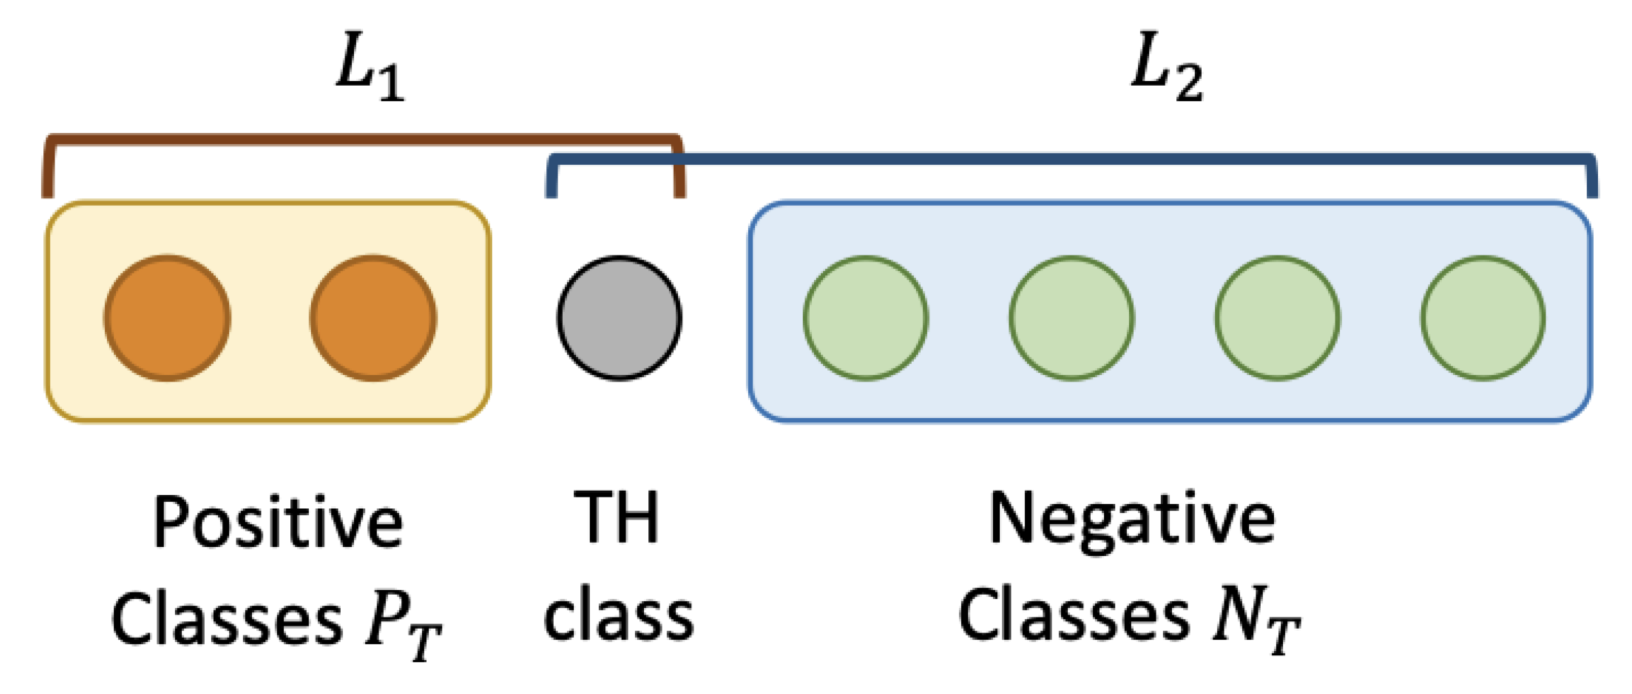
</div>
How?

- with a new threshold class that learns an entities-dependent threshold value
- Positive classes: classes with higher logins that the TH class. Negative classes: all others.

### <center>Localised Context Pooling</center>

- Straight-forward handling of cases where there are two entities we want to pay model’s attention to: compose two embeddings
- BUT! Some context of the entities may not be relevant. 
- <b>—> a localised representation that attends to the relevant context in the document that is useful to decide the relation for this entity pair. </b>

<div>
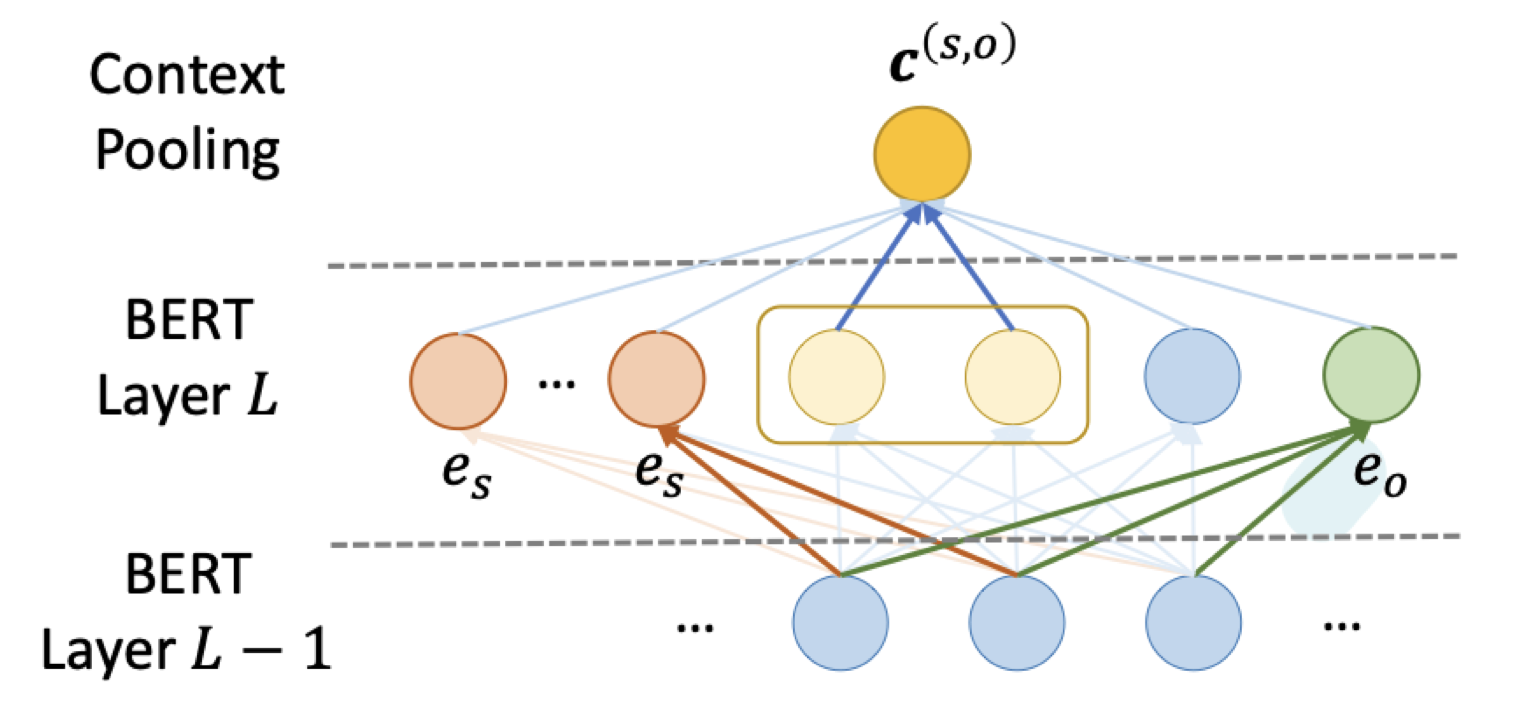
</div>
How? 

- Enhance the embedding of an entity pair with an additional local context embedding related to both entities
- Direct use of attention heads for localised context pooling.

# 3. Config

In [1]:
# here is the config file
%cat deeppavlov/configs/relation_extraction/re_docred.json

{
  "dataset_reader": {
    "class_name": "docred_reader",
    "valid_test_data_size": 150,
    "data_path": "{DOWNLOADS_PATH}/docred/",
    "rel2id_path": "{DOWNLOADS_PATH}/docred/meta/rel2id.json"
  },
  "dataset_iterator": {
    "class_name": "basic_classification_iterator"
  },
  "chainer": {
    "in": ["input_x"],
    "in_y": ["y_ids"],
    "pipe": [
      {
        "in": ["input_x"],
        "out": ["input_x_bert"],
        "class_name": "torch_transformers_re_preprocessor",
        "vocab_file": "bert-base-uncased"
      },
      {
        "class_name": "re_torch_transformers_classifier",
        "in": ["input_x_bert"],
        "in_y": ["y_ids"],
        "out": ["model_output"],
        "save_path": "{MODEL_PATH}/model",
        "load_path": "{MODEL_PATH}/model",
        "model_name": "re_model",
        "n_classes": 97,
        "num_ner_tags": 6,
        "pretrained_bert": "bert-base-uncased",
        "return_probas": true
      },
      {
        "class_name": "re_postprocesso

The model was already trained with ```python3.7 -m deeppavlov train re_docred```.

The trained weights could be dowloaded with ```!python -m deeppavlov download re_docred```. We have already done it in advance and can initialize the model now.

# 5. Predictions

In [2]:
from deeppavlov import configs, build_model
re_model = build_model(configs.relation_extraction.re_docred, download=False)

[nltk_data] Downloading package punkt to /home/evseev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/evseev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!
2021-07-16 16:33:31.60 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 145: Load path /cephfs/home/evseev/.deeppavlov/models/re_docred_old_setting/model is given.
2021-07-16 16:33:31.69 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 152: Load path /cephfs/home/evseev/.deeppavlov/models/re_docred_old_setting/model.pth.tar exists.
2021-07-16 16:33:31.71 INFO in 'deeppavlov.core.models.torch_model'['tor

Input to the RE model is:
  - tokenized data samples
  - information about entities: 
      - positions of entity mentions
      - entity NER tags
      
Example: 
- data sample: *Barack Obama is married to Michelle Obama, born Michelle Robinson*
- entities: 
    - entity 1: *Barack Obama*
    - entity 2: *Michelle Obama*, *Michelle Robinson*
- RE model input: 
        [
          (
            ["Barack", "Obama", "is", "married", "to", "Michelle", "Obama", "," "born", "Michelle", "Robinson"],
            [
              [(0, 2)],
              [(5, 7), (9, 11)], 
              PER, 
              PER
            ]
          )
        ]
- true label to be found: "spouse"

In [3]:
# example 1

sentence_tokens = ["Barack", "Obama", "is", "married", "to", "Michelle", "Obama", "," "born", "Michelle", "Robinson", "."]
entity_info = [[(0, 2)], [(5, 7), (9, 11)], "PER", "PER"]
pred = re_model([[sentence_tokens, entity_info]])
print(pred)

[[('P26', 'spouse')]]


In [4]:
# example 2

sentence_tokens = ["Barack", "Obama", "has", "two", "daughters", ":", "Sasha", "and", "Malia", "."]
entity_info = [[(6, 7)], [(8, 9)], "PER", "PER"]
pred = re_model([[sentence_tokens, entity_info]])
print(pred)

[[('P3373', 'sibling')]]


In [5]:
# example 3

sentence_tokens = ["New", "York", "is", "the", "capital", "of", "the", "USA", "."]
entity_info = [[(0, 2)], [(7, 8)], "LOC", "LOC"]
pred = re_model([[sentence_tokens, entity_info]])
print(pred)

[[('P17', 'country')]]


In [6]:
# example 4

sentence_tokens = ["New", "York", "is", "the", "capital", "of", "the", "USA", "."]
entity_info = [[(7, 8)], [(0, 2)], "LOC", "LOC"]
pred = re_model([[sentence_tokens, entity_info]])
print(pred)

[[('P150', 'contains administrative territorial entity')]]


In [7]:
# example 5

sentence_tokens = ["Elon", "Mask", "was", "born", "in", "Pretoria", "."]
entity_info = [[(0, 2)], [(5, 6)], "PER", "LOC"]
pred = re_model([[sentence_tokens, entity_info]])
print(pred)

[[('P19', 'place of birth')]]


In [10]:
# example 6

sentence_tokens_4 = ["The", "Iron", "Age", "started", "around", "1200", "B.C."]
entity_info_4 = [[(0, 3)], [(5, 7)], "MISC", "TIME"]
pred_4 = re_model([[sentence_tokens_4, entity_info_4]])
print(pred_4)

[[('P580', 'start time')]]


Congarts! You tried relation extraction for English with DeepPavlov. More tutorials are yet to come :)